In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Chirag\Desktop\business_analytics\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df = df.drop('customerID',axis= 1)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking the data types

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# converting TotalCharges to numeric dataType

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [9]:
df['TotalCharges'].isna().value_counts()

TotalCharges
False    7032
True       11
Name: count, dtype: int64

In [10]:
df = df.dropna()
df['TotalCharges'].isna().value_counts()

TotalCharges
False    7032
Name: count, dtype: int64

In [11]:
#df[df.duplicated(keep = False)]

In [ ]:
#df.duplicated().sum()

# Create new Features

In [12]:
df['is_long_term_customer'] = df['tenure'].apply(lambda x: 1 if x >= 12 else 0)
df['total_spent'] = df['tenure'] * df['MonthlyCharges']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   SeniorCitizen          7032 non-null   int64  
 2   Partner                7032 non-null   object 
 3   Dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   PhoneService           7032 non-null   object 
 6   MultipleLines          7032 non-null   object 
 7   InternetService        7032 non-null   object 
 8   OnlineSecurity         7032 non-null   object 
 9   OnlineBackup           7032 non-null   object 
 10  DeviceProtection       7032 non-null   object 
 11  TechSupport            7032 non-null   object 
 12  StreamingTV            7032 non-null   object 
 13  StreamingMovies        7032 non-null   object 
 14  Contract               7032 non-null   object 
 15  Paperless

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,is_long_term_customer,total_spent
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.707338,2283.147248
std,0.368844,24.545260,30.085974,2266.771362,0.455017,2264.703327
min,0.000000,1.000000,18.250000,18.800000,0.000000,18.800000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,397.800000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,1394.575000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,3791.250000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,8550.000000


# Univariate Analysis


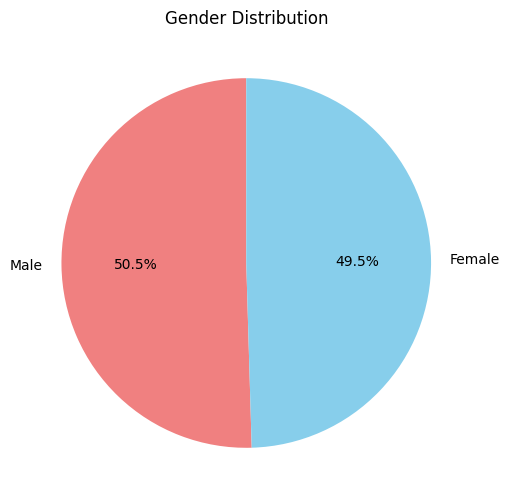

In [15]:
df['gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue'],
    figsize=(6, 6)
)
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

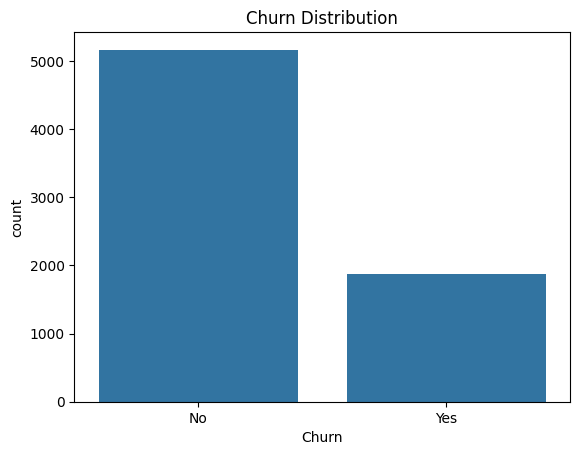

In [13]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

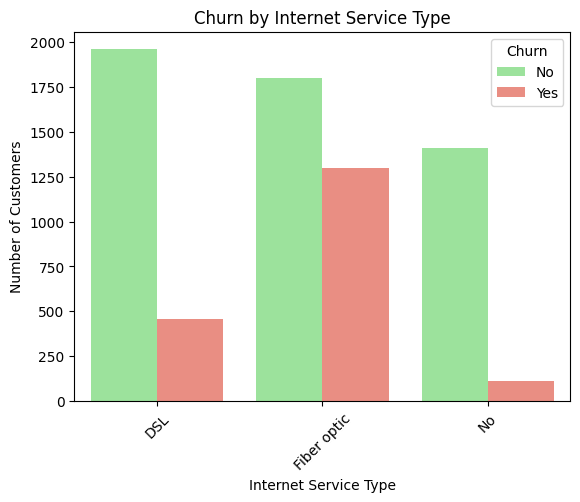

In [17]:
sns.countplot(
    data=df,
    x='InternetService',
    hue='Churn',
    palette={'Yes': 'salmon', 'No': 'lightgreen'}
)

plt.title('Churn by Internet Service Type')
plt.ylabel('Number of Customers')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

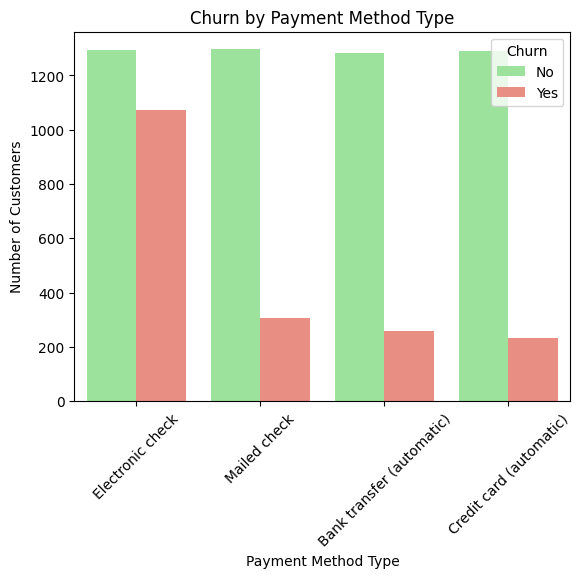

In [16]:
sns.countplot(
    data=df,
    x='PaymentMethod',
    hue='Churn',
    palette={'Yes': 'salmon', 'No': 'lightgreen'}
)

plt.title('Churn by Payment Method Type')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Method Type')
plt.xticks(rotation=45)
plt.show()

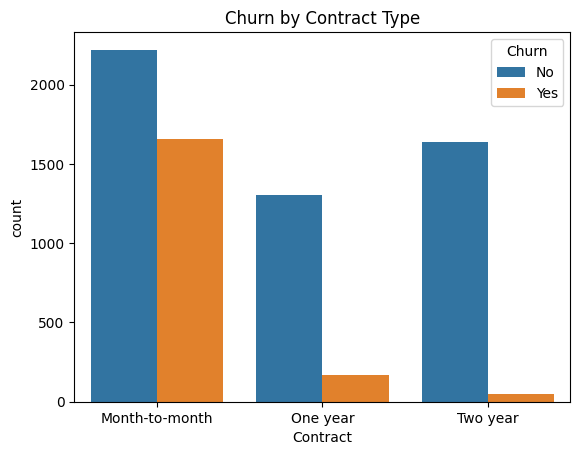

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

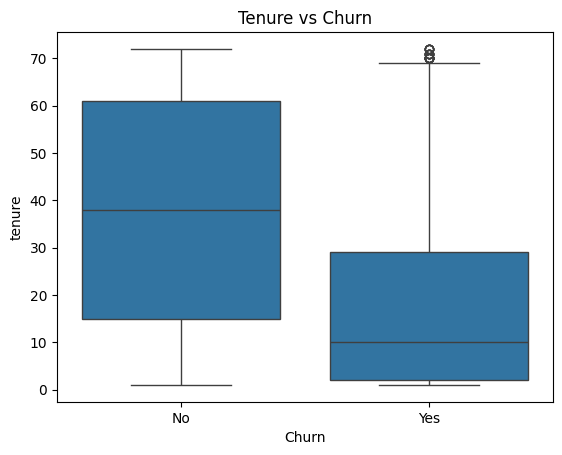

In [21]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

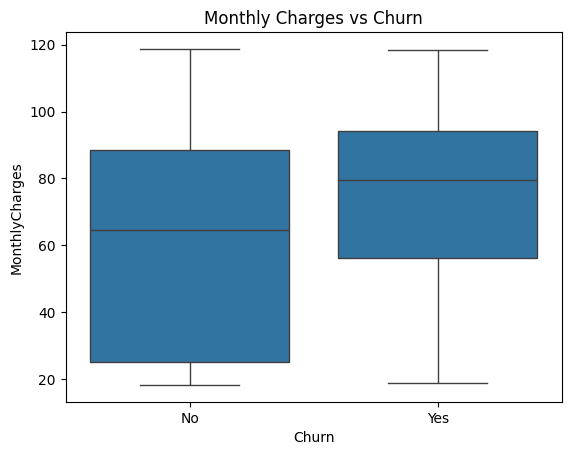

In [16]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

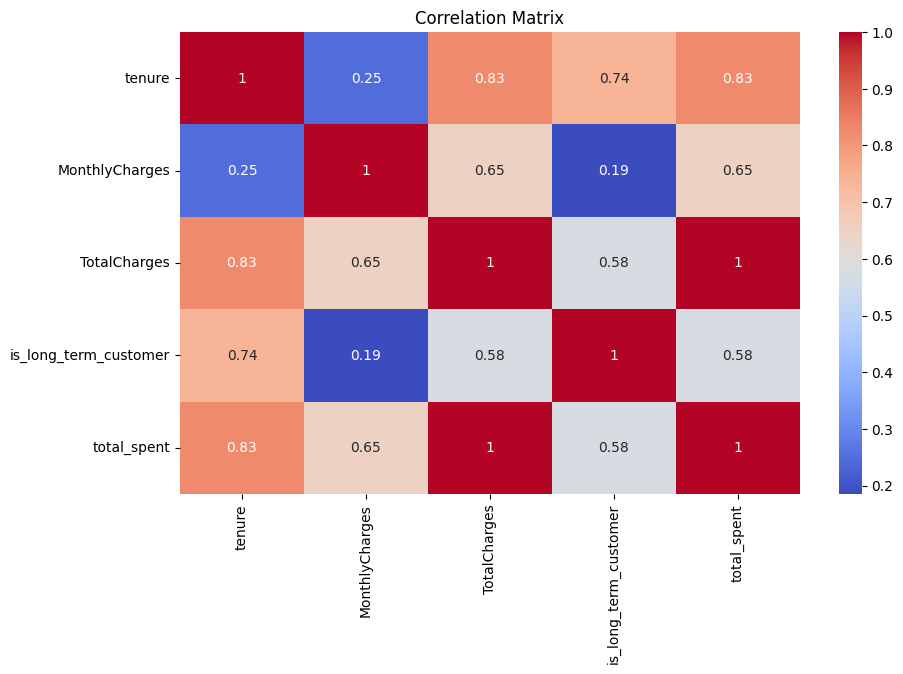

In [17]:
plt.figure(figsize=(10, 6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'is_long_term_customer', 'total_spent']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})




categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

feature_columns = df.drop('Churn', axis=1).columns.tolist()
joblib.dump(feature_columns, r'C:\Users\Chirag\Desktop\business_analytics\src\features.pkl')

df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,is_long_term_customer,total_spent,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,29.85,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,1,1936.30,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,0,107.70,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,1,1903.50,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,0,141.40,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,2035.20,True,True,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,1,7430.40,False,True,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,0,325.60,False,True,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,0,297.60,True,True,False,...,False,False,False,False,False,False,True,False,False,True


In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   is_long_term_customer                  7032 non-null   int64  
 5   total_spent                            7032 non-null   float64
 6   gender_Male                            7032 non-null   bool   
 7   Partner_Yes                            7032 non-null   bool   
 8   Dependents_Yes                         7032 non-null   bool   
 9   PhoneService_Yes                       7032 non-null   bool   
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

In [21]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Random Forest model
model = RandomForestClassifier(random_state=21)
model.fit(X_train, y_train)
# Predictions on train
y_pred_train = model.predict(X_train)

#score on the train set
accuracy_score(y_train, y_pred_train)

0.9980444444444444

In [24]:
#predictions on test
y_pred_test = model.predict(X_test)

#score on the train set
accuracy_score(y_test, y_pred_test)

0.7860696517412935


Train Set Evaluation
Confusion Matrix:
 [[4151    5]
 [   6 1463]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4156
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625

ROC AUC: 0.9999152356922762


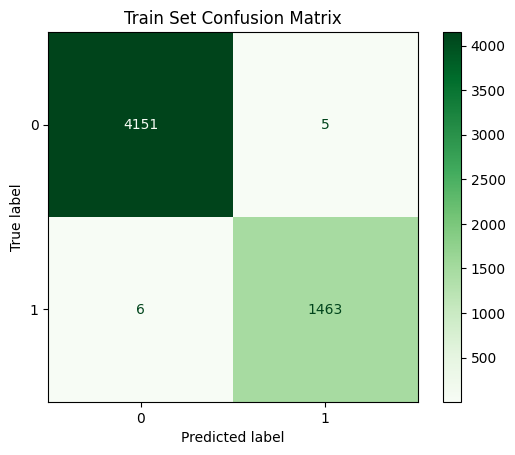

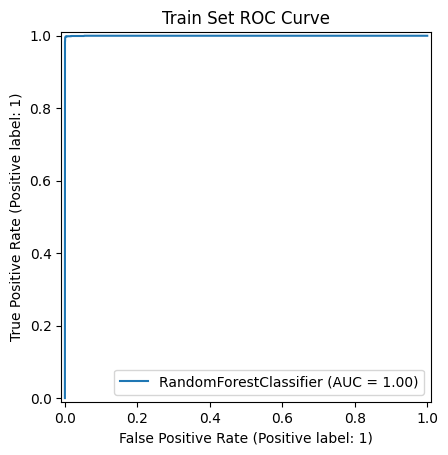

In [25]:
# Evaluation on train
print("\nTrain Set Evaluation")
# y_train_pred = model.predict(X_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))
print("ROC AUC:", roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

# Confusion matrix display for train
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap='Greens')
plt.title("Train Set Confusion Matrix")
plt.show()

# ROC curve for train
RocCurveDisplay.from_estimator(model, X_train, y_train)
plt.title("Train Set ROC Curve")
plt.show()

Test Set Evaluation
Confusion Matrix:
 [[912  95]
 [206 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1007
           1       0.67      0.48      0.56       400

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.79      0.77      1407

ROC AUC: 0.8270283018867925


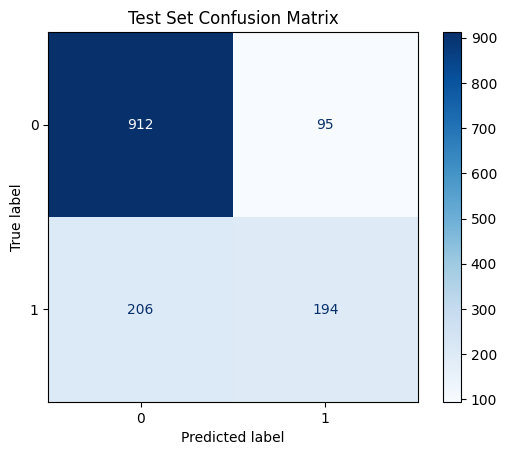

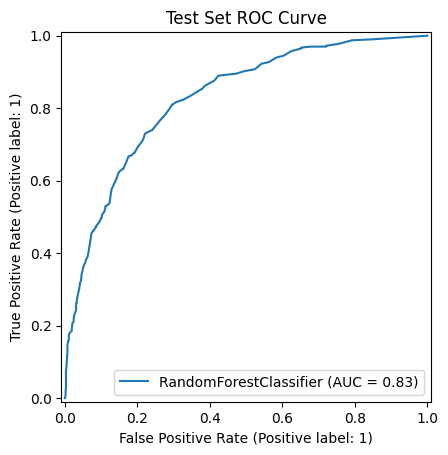

In [26]:
# Evaluation on test
print("Test Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Confusion matrix display for test
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Test Set Confusion Matrix")
plt.show()

# ROC curve for test
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Test Set ROC Curve")
plt.show()

In [27]:
print("\nROC AUC for different random seeds:")
for seed in [0, 21, 42, 100, 2024]:
    X_train_seed, X_test_seed, y_train_seed, y_test_seed = train_test_split(X, y, test_size=0.2, random_state=seed)
    model_seed = RandomForestClassifier(random_state=seed)
    model_seed.fit(X_train_seed, y_train_seed)
    auc = roc_auc_score(y_test_seed, model_seed.predict_proba(X_test_seed)[:, 1])
    print(f"Seed {seed} - Test ROC AUC: {auc:.4f}")



ROC AUC for different random seeds:
Seed 0 - Test ROC AUC: 0.8271
Seed 21 - Test ROC AUC: 0.8270
Seed 42 - Test ROC AUC: 0.8225
Seed 100 - Test ROC AUC: 0.8131
Seed 2024 - Test ROC AUC: 0.8072


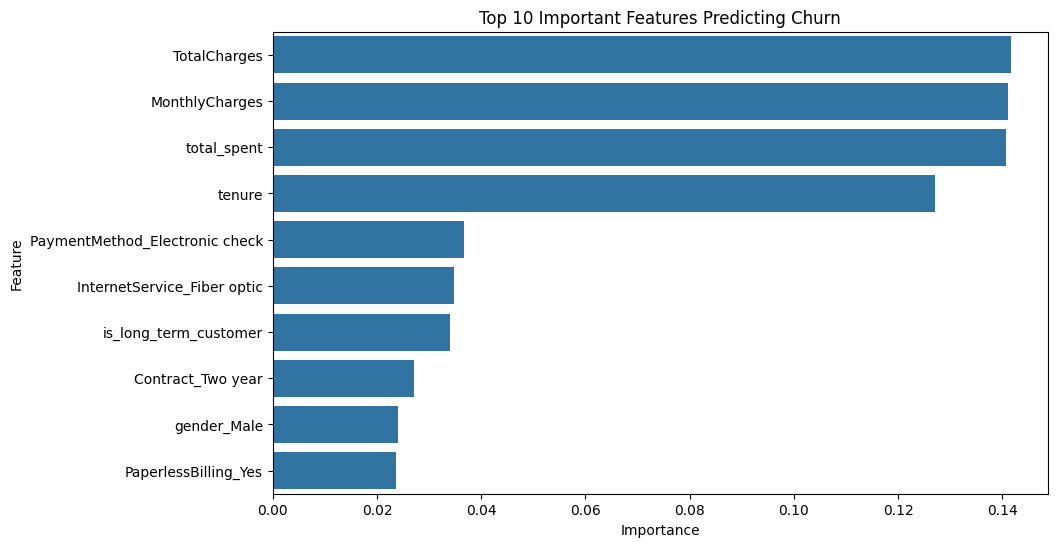

In [28]:
# 04_Insights_Visualization.ipynb
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top 10 Important Features Predicting Churn")
plt.show()
# Insights:
# - Contract_Month-to-month, tenure, and InternetService_Fiber optic are top churn predictors
# - Newly created features like total_spent and is_long_term_customer help capture spending behavior and loyalty

In [29]:
import joblib
joblib.dump(model, r'C:\Users\Chirag\Desktop\business_analytics\src\model.pkl')

['C:\\Users\\Chirag\\Desktop\\business_analytics\\src\\model.pkl']